In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.optim as optim
from torch.autograd import Variable

In [2]:
data_train = np.load('Dataset/data_train.npy')
X = data_train[:,:3]
Y = data_train[:,-1]
print(X.shape)
print(Y.shape)

(2400000, 3)
(2400000,)


In [3]:
standarder = StandardScaler()

In [4]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=0)
standarder.fit(X_train)
X_train = standarder.transform(X_train)
standarder.transform(X_train)
X_test = standarder.transform(X_test)
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
Y_train = torch.from_numpy(Y_train)
Y_test = torch.from_numpy(Y_test)

In [5]:
data_train = Data.TensorDataset(X_train, Y_train)
data_test = Data.TensorDataset(X_test, Y_test)

In [6]:
BATCH_SIZE = 512
loder_train = Data.DataLoader(data_train, batch_size= BATCH_SIZE, shuffle= True)
loder_test = Data.DataLoader(data_test, batch_size= BATCH_SIZE, shuffle= False)

In [7]:
class softmaxNet(nn.Module):
    def __init__(self):
        super(softmaxNet, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(3,200) , nn.ReLU(inplace = True), nn.Dropout())
        self.layer2 = nn.Sequential(nn.Linear(200,150) , nn.ReLU(inplace = True), nn.Dropout())
        self.layer3 = nn.Sequential(nn.Linear(150,100) , nn.ReLU(inplace = True), nn.Dropout())
        self.layer4 = nn.Sequential(nn.Linear(100,50) , nn.ReLU(inplace = True), nn.Dropout())
        self.layer5 = nn.Sequential(nn.Linear(50,10) , nn.ReLU(inplace = True), nn.Dropout(0.2))
        self.layer6 = nn.Sequential(nn.Linear(10,1), nn.Sigmoid())
        
    
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        
        return x

In [8]:
net = softmaxNet()
#if torch.cuda.is_available():
#    net = net.cuda()
print(net)

softmaxNet(
  (layer1): Sequential(
    (0): Linear(in_features=3, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
  )
  (layer2): Sequential(
    (0): Linear(in_features=200, out_features=150, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=150, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
  )
  (layer4): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
  )
  (layer5): Sequential(
    (0): Linear(in_features=50, out_features=10, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.2, inplace=False)
  )
  (layer6): Sequential(
    (0): Linear(in_features=10, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


In [9]:
learning_rate = 0.005
#criterion = nn.BCELoss()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(net.parameters(), lr= learning_rate)

In [10]:
num_epoch = 3
step_acc_list = []
for epoch in range(num_epoch):
    print('Epoch = {:d} '.format(epoch + 1))
    
    '''
    epoch_loss = 0
    epoch_acc = 0
    '''
    
    step_loss = 0
    step_acc = 0
    
    for step, (img, label) in enumerate(loder_train):
        
        '''
        print(img)
        print(img.shape)
        print(label)
        print(label.shape)
        
        if torch.cuda.is_available():
            img = img.cuda().float()
            label = label.cuda().long()
        else:
            img = img.float()
            label = label.long()
        '''
        
        img = img.float()
        label = label.float().reshape(-1,1)
        #print(label)
        #print(label.shape)
        
        out = net(img)
        #print(out)
        #print(out.ceil())
        #print((out.ceil() == label).sum())
        #print(out.shape)
        
        loss = criterion(out, label) #必须全化为float

        step_loss += loss.data
        num_correct = (out.ceil() == label).sum()
        step_acc += num_correct.data
        #print(step_acc)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #if step == 0:
            #break
        
        if (step + 1) % 100 == 0:
            step_acc = float(step_acc) / (BATCH_SIZE * 100)
            step_acc_list.append(step_acc)
            print('step = {:d}, Loss = {:.4f}, Acc = {:.4f} '.format(step + 1, step_loss, step_acc))
            step_loss = 0
            step_acc = 0

Epoch = 1 
step = 100, Loss = 50.5927, Acc = 0.7621 
step = 200, Loss = 48.5358, Acc = 0.7629 
step = 300, Loss = 48.6849, Acc = 0.7643 
step = 400, Loss = 48.3184, Acc = 0.7687 
step = 500, Loss = 48.3888, Acc = 0.7658 
step = 600, Loss = 48.3580, Acc = 0.7722 
step = 700, Loss = 48.0945, Acc = 0.7762 
step = 800, Loss = 47.9590, Acc = 0.7822 
step = 900, Loss = 48.3309, Acc = 0.7817 
step = 1000, Loss = 47.9700, Acc = 0.7822 
step = 1100, Loss = 48.0453, Acc = 0.7825 
step = 1200, Loss = 48.0792, Acc = 0.7845 
step = 1300, Loss = 48.1023, Acc = 0.7903 
step = 1400, Loss = 47.8435, Acc = 0.7909 
step = 1500, Loss = 48.0287, Acc = 0.7817 
step = 1600, Loss = 47.9551, Acc = 0.7940 
step = 1700, Loss = 48.0899, Acc = 0.7998 
step = 1800, Loss = 48.0674, Acc = 0.7954 
step = 1900, Loss = 48.1152, Acc = 0.7863 
step = 2000, Loss = 47.9566, Acc = 0.7967 
step = 2100, Loss = 48.2358, Acc = 0.7996 
step = 2200, Loss = 48.1296, Acc = 0.7988 
step = 2300, Loss = 48.0043, Acc = 0.8024 
step = 24

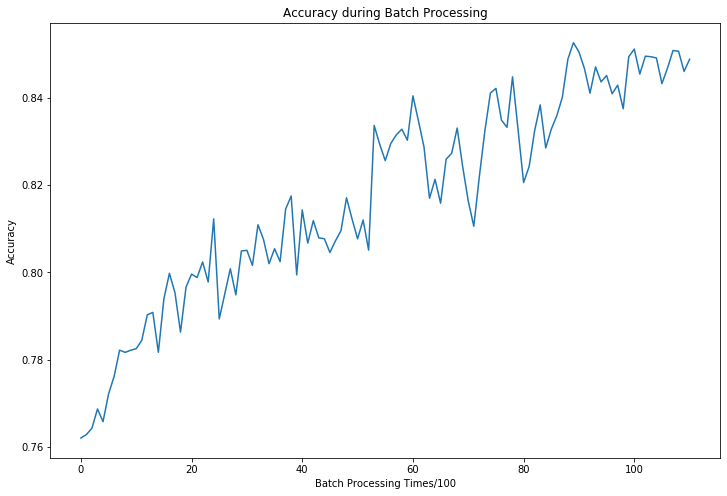

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xlabel('Batch Processing Times/100')
plt.ylabel('Accuracy', rotation = 90)
plt.title('Accuracy during Batch Processing')
plt.plot(np.arange(len(step_acc_list)), np.array(step_acc_list))
plt.savefig('figures/step_acc_list.png')
plt.show()

In [16]:
step_acc_list = np.array(step_acc_list)

In [17]:
np.save('step_acc_list.npy', step_acc_list)

In [19]:
test_acc = 0
test_loss = 0

for step, (img, label) in enumerate(loder_test):
        
    '''
    print(img)
    print(img.shape)
    print(label)
    print(label.shape)
        
    if torch.cuda.is_available():
        img = img.cuda().float()
        label = label.cuda().long()
    else:
        img = img.float()
        label = label.long()
    '''
        
    img = img.float()
    label = label.float().reshape(-1,1)
    #print(label)
    #print(label.shape)
        
    out = net(img)
    #print(out)
    #print(out.ceil())
    #print((out.ceil() == label).sum())
    #print(out.shape)
        
    loss = criterion(out, label) #必须全化为float

    test_loss += loss.data
    num_correct = (out.ceil() == label).sum()
    test_acc += num_correct.data
    #print(acc)

test_acc = float(test_acc) / len(Y_test)    
print('Test_loss = {:.4f}, Test_acc = {:.4f} '.format(test_loss, test_acc))

Test_loss = 450.9933, Test_acc = 0.8406 


In [20]:
torch.save(net, 'model/softmaxNet.pkl')

D:\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type softmaxNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
